In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

my_predictions = {}
my_pred = None
my_actual = None
my_name = None

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global my_predictions, colors, my_pred, my_actual, my_name
    
    my_name = name_
    my_pred = pred
    my_actual = actual

    #plot_predictions(name_, pred, actual)

    mse = accuracy_score(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=False)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('Accuracy', fontsize=16)
    plt.xlim(0, 1)
    
    plt.show()
    
def add_model(name_, pred, actual):
    global my_predictions, my_pred, my_actual, my_name
    my_name = name_
    my_pred = pred
    my_actual = actual
    
    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

def plot_all():
    global my_predictions, my_pred, my_actual, my_name
    
    plot_predictions(my_name, my_pred, my_actual)
    
    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df) / 2
    
    plt.figure(figsize=(9, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=12)
    bars = ax.barh(np.arange(len(df)), df['mse'], height=0.3)
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=12, fontweight='bold', verticalalignment='center')
        
    plt.title('MSE Error', fontsize=16)
    plt.xlim(min_, max_)
    
    plt.show()

In [3]:
df_player = pd.read_excel('volleyball_선수별.xlsx')

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df_player['팀명'])
df_player['팀명'] = le.transform(df_player['팀명'])

In [5]:
le_2 = LabelEncoder()
le_2.fit(df_player['이름'])
df_player['이름'] = le_2.transform(df_player['이름'])

In [6]:
df_player['공격종합_성공률'] = df_player['공격종합_성공률'].fillna(df_player['공격종합_성공률'].mean())
df_player['오픈_성공률'] = df_player['오픈_성공률'].fillna(df_player['오픈_성공률'].mean())
df_player['시간차_성공률'] = df_player['시간차_성공률'].fillna(df_player['시간차_성공률'].mean())
df_player['후위_성공률'] = df_player['후위_성공률'].fillna(df_player['후위_성공률'].mean())
df_player['퀵오픈_성공률'] = df_player['퀵오픈_성공률'].fillna(df_player['퀵오픈_성공률'].mean())
df_player['서브_성공률'] = df_player['서브_성공률'].fillna(df_player['서브_성공률'].mean())
df_player['디그_성공률'] = df_player['디그_성공률'].fillna(df_player['디그_성공률'].mean())
df_player['세트_성공률'] = df_player['세트_성공률'].fillna(df_player['세트_성공률'].mean())
df_player['리시브_효율'] = df_player['리시브_효율'].fillna(df_player['리시브_효율'].mean())
df_player['블로킹_성공률'] = df_player['블로킹_성공률'].fillna(df_player['블로킹_성공률'].mean())

# scaling

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

SEED = 45

X = df_player.drop(['경기날짜', '결과', '공격효율'], axis =1)
y = df_player['결과']

use_cols = ['득점_득점', '서브_성공률', '디그_성공률',
            '세트_성공률', '리시브_효율', '블로킹_성공률','범실_범실']

scaler = StandardScaler()

x_scaled = scaler.fit_transform(X)

x_cols = df_player[use_cols]

X_train, X_test, y_train, y_test = train_test_split(x_cols, y, stratify=y, random_state=SEED)

X_train.shape , X_test.shape

((8247, 7), (2750, 7))

# 로지스틱 Reg

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)
pred = model.predict(X_test)

model.score(X_train, y_train), model.score(X_test, y_test)

(0.5916090699648356, 0.588)

                    model    mse
0  Logistic_max_iter_5000  0.588
1  Logistic_max_iter_1000  0.588
2   Logistic_max_iter_500  0.588


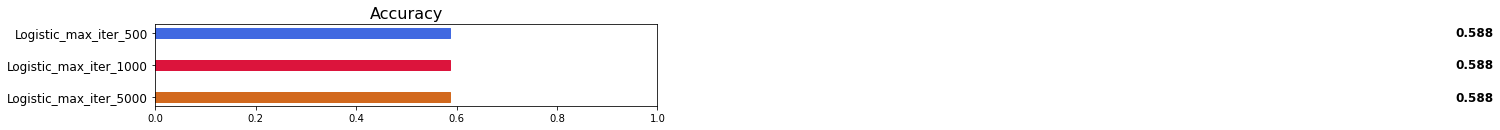

In [37]:
mse_eval('Logistic_max_iter_500', pred, y_test)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBClassifier

# Polynomial

In [24]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    XGBClassifier(random_state = 0)
)
poly_pipeline.fit(X_train, y_train)
poly_pred = poly_pipeline.predict(X_test)

poly_pipeline.score(X_train, y_train), poly_pipeline.score(X_test, y_test)

(0.8861404146962532, 0.5792727272727273)

In [ ]:
mse_eval('Poly ElasticNet', poly_pred, y_test)

# RandomForest

In [18]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rfr = RandomForestClassifier(max_depth=3, n_estimators=5000)
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

rfr.score(X_train, y_train), rfr.score(X_test, y_test)

(0.6113738329089365, 0.5949090909090909)

                                               model       mse
0  RandomForest Ensemble, max_depth=2, n_estimato...  0.591636
1  RandomForest Ensemble, max_depth=3, n_estimato...  0.593818
2                              RandomForest Ensemble  0.605091


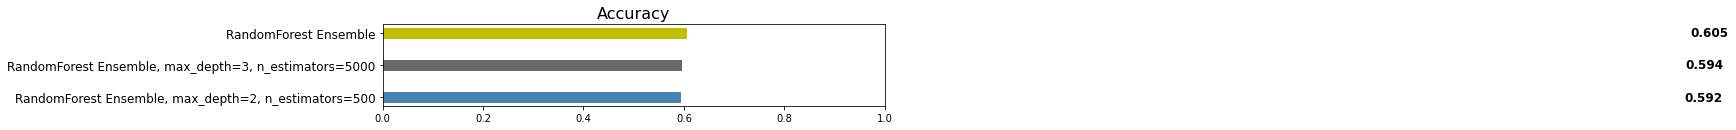

In [78]:
mse_eval('RandomForest Ensemble, max_depth=3, n_estimators=5000', rfr_pred, y_test)

# XGBoost

In [8]:
# 파라미터 튜닝 없는 XGBRegressor 
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.8240572329331878, 0.5978181818181818)

     model       mse
0  XGBoost  0.597818


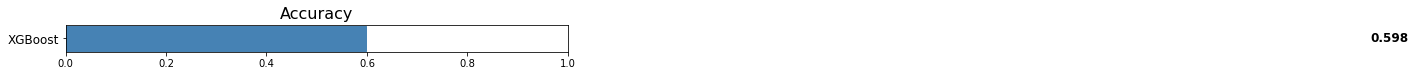

In [9]:
mse_eval('XGBoost', xgb_pred, y_test)

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0, learning_rate = 0.01, n_estimators = 100, subsample= 1.0)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb.score(X_train, y_train), xgb.score(X_test, y_test)

(0.6596338062325694, 0.5967272727272728)

                                               model       mse
0  XGBoost_learning_rate=0.1,n_estimators=100,sub...  0.596727
1                                            XGBoost  0.597818
2  XGBoost_learning_rate=0.1,n_estimators=1000,su...  0.610182


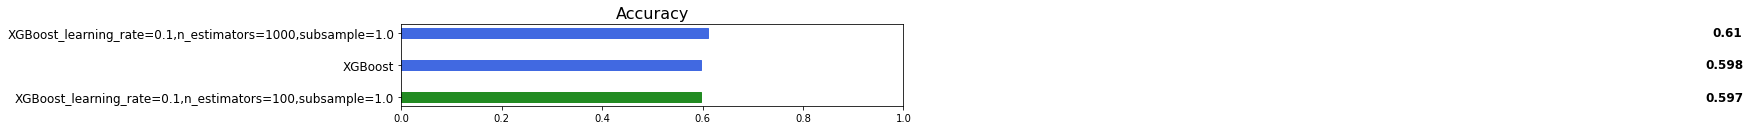

In [16]:
mse_eval('XGBoost_learning_rate=0.1,n_estimators=100,subsample=1.0', xgb_pred, y_test)

# ensemble

In [27]:
from sklearn.ensemble import VotingClassifier, VotingRegressor

single_models = [
    ('XGBoost', xgb),
    ('Polynomial', poly_pipeline),
    ('Random', rfr)
]

voting_classifier = VotingClassifier(single_models , n_jobs=-1)
voting_classifier.fit(X_train, y_train)
voting_pred = voting_classifier.predict(X_test)

voting_classifier.score(X_train, y_train), voting_classifier.score(X_test, y_test)

(0.6978295137625803, 0.6032727272727273)

                                               model       mse
0                             Voting Ensemble_scaled  0.591636
1  XGBoost_learning_rate=0.1,n_estimators=100,sub...  0.596727
2                                            XGBoost  0.597818
3  XGBoost_learning_rate=0.1,n_estimators=1000,su...  0.610182


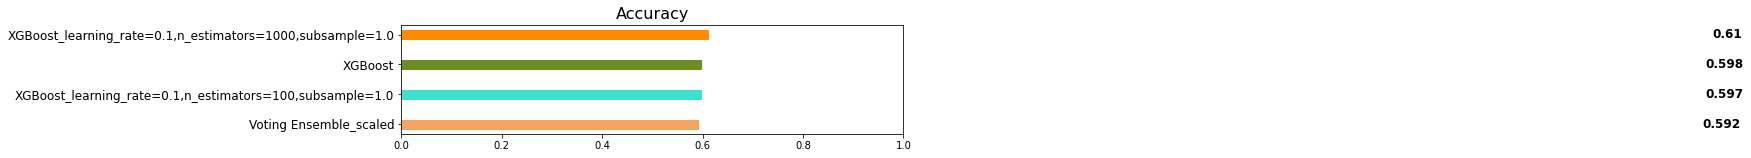

In [25]:
mse_eval('Voting Ensemble_scaled', voting_pred, y_test)